# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [4]:
N = 100
u=stats.uniform()
data = u.rvs(size=N)
mu= 1
sigma = 1

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


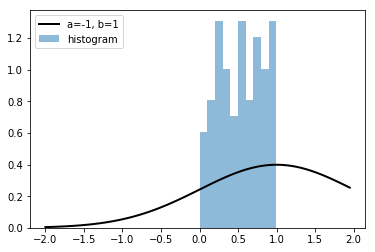

In [5]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma=\sqrt(\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$)</li>
</ul>

In [6]:
mu = np.mean(data)
sigma = np.std(data, ddof=0)
print(mu, sigma)

0.5339685166793035 0.28107162786934403


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


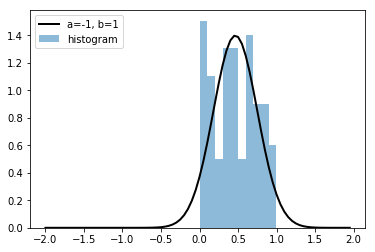

In [5]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [6]:
(mu, sigma) = stats.norm.fit(data)
print(mu, sigma)
# te same wyniki jak powyżej - czyli wszystko ok

0.48646504612432717 0.28360058060176335


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


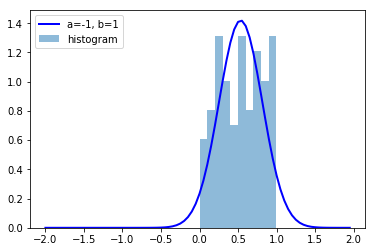

In [7]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'b-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [8]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [9]:
# def funkcji kosztów, która bęðzie optymalizować mu i sigma, najlepiej jako jeden argument
# data - zmienna globalna, dane które nie mają być optymalizowane
def MLE_N(arg):
    mu, sigma = arg
    return -np.sum(np.log(Gpdf(data, mu, np.abs(sigma))))
# dodana wart bezwzgl abs żeby nie otrzymywać wart ujemnych

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
MLE_N((0,1))

110.1000351603582

In [11]:
MLE_N((0,2))

165.76011683643455

In [12]:
MLE_N((1,1))

106.70318349242785

In [13]:
MLE_N((0.5,0.2))
# dla tej pary powinna wyjść najmniejsza wartość i tak jest

31.14396222520113

In [14]:
MLE_N((2,0.1))

11002.883194424085

# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [15]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 4
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [16]:
x0 = np.asarray((0, 1))  # Initial guess.
res1 = optimize.fmin_cg(MLE_N, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 16.486889
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 24
[0.46516062 0.28534119]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.


In [17]:
def SGdf(x, m, sigma, tau):
    C = np.sqrt(2./np.pi)*np.power(np.abs(sigma), -1.)*np.power(1+np.abs(tau), -1.)
    if (x <= m):
        return C*np.exp(-1/(2*sigma**2)*(x-m)**2)
    else:
        return C*np.exp(-1/(2*tau**2*sigma**2)*(x-m)**2)
    
SGdf_vec = np.vectorize(SGdf)

No handles with labels found to put in legend.


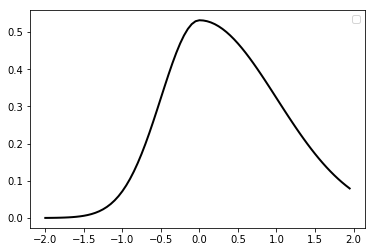

In [18]:
# wykres tej funkcji
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGdf_vec(t, 0, 1/2, 2), 'k-', lw=2)
ax.legend()
plt.show()

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [19]:
# wyżej

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [20]:
def MLE_SN(arg):
    mu, sigma, tau = arg
    return -np.sum(np.log(SGdf_vec(data, mu, np.abs(sigma), np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [21]:
x0 = np.asarray((0, 1, 1))  # Initial guess.
res2 = optimize.fmin_cg(MLE_SN, x0)
print(res2)

         Current function value: 12.219769
         Iterations: 145
         Function evaluations: 1784
         Gradient evaluations: 355
[ 0.05597305  0.03254468 15.80283562]


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


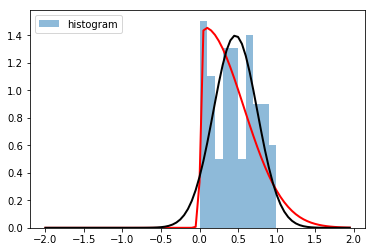

In [22]:
mu, sigma, tau = res2
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
# ax.plot(t, SGdf_vec(t,mu, sigma, tau), 'r-', lw=2)
ax.plot(t, SGdf_vec(t,res2[0], res2[1], res2[2]), 'r-', lw=2)
ax.plot(t, stats.norm.pdf(t,res1[0], res1[1]), 'k-', lw=2)
ax.legend()
plt.show()

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [23]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [24]:
mu=np.mean(data)
sigma=np.std(data)
tau=np.std(data)

In [25]:
x0 = np.asarray((mu, sigma, tau))  # Initial guess.
res1 = optimize.fmin_cg(MLE_SN, x0)
print(res1)

         Current function value: 984.728630
         Iterations: 146
         Function evaluations: 1832
         Gradient evaluations: 364
[ 1.44347653  0.15734946 20.53326075]
